# **Productivity prediction of manufacturing process in clothing industry**

**MachineLearning**

<br><br><br><br><br>
<div style="text-align: right">
강동현
박은빈
장대근
정규헌
이하늘
</div>


- 최근 의류 제조업에서의 정체, 위기 언급
- 자본 투입의 신중함이 요구됨에 따라 투입된 자본량과 산출될 생산량이 어떻게 될지 예측할 수 있다면, 위기 관리 등을 통해 현재 의류산업이 맞이한 정체기를 극복 하는데 도움을 줄 수 있을거라는 생각

![articles](./articles.png)

- Through the data below and ML, we want to predict more accurate productivity in the clothing manufacturing industry.
- In conclusion, we aims to improve productivity and achieve various economic gains in the entire process.

**Thus**

### **Problem Definition** : Develop productivity prediction algorithm for clothing manufacturing industry

In [159]:
import pandas as pd
train = pd.read_csv('train.csv')
train

,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
3,TRAIN_0003,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
4,TRAIN_0004,Quarter1,sweing,Thursday,0.80,25.90,1170,0.07407,50,0,0,0,56,0.80038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,TRAIN_1192,Quarter2,finishing,Wednesday,0.75,2.90,1190,0.03704,0,0,0,0,8,0.62833
1193,TRAIN_1193,Quarter2,finishing,Wednesday,0.70,3.90,1190,0.03704,0,0,0,0,8,0.62562
1194,TRAIN_1194,Quarter2,finishing,Wednesday,0.65,3.90,1190,0.03704,0,0,0,0,8,0.62562
1195,TRAIN_1195,Quarter2,finishing,Wednesday,0.75,2.90,1190,0.06944,0,0,0,0,15,0.50589


In [160]:
# library load

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_dirs = ['/Users/Dacon/AppData/Local/Microsoft/Windows/Fonts', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

## warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

## 결과 확인을 용이하게 하기 위해 실행하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [161]:
# pwd

In [162]:
# data load
train = pd.read_csv('train.csv') # 모델 학습 파일
test = pd.read_csv('test.csv') # 모델 시험지 파일
submission = pd.read_csv('sample_submission.csv') #답안지 파일 ; 제출 파일 형식

# Exploratory Data Analysis (EDA)

<br><br><br><br><br>



## **Columns Detail**


**[ feature ]**
- <span style='background-color:#d3d3d3'>ID</span> : Unique id
- <span style='background-color:#d3d3d3'>quarter</span> : divide a month into five groups
- <span style='background-color:#d3d3d3'>department</span> : department      (Categorical)
- <span style='background-color:#d3d3d3'>day</span> : day      (Categorical)
- <span style='background-color:#d3d3d3'>targeted_productivity</span> : Targeted productivity set by the Authority on a daily by team
- <span style='background-color:#d3d3d3'>smv</span> : Number of minutes allocated for the job
- <span style='background-color:#d3d3d3'>wip</span> : Number of items in progress or incomplete 
- <span style='background-color:#d3d3d3'>over_time</span> : Number of minutes of overtime for each team
- <span style='background-color:#d3d3d3'>incentive</span> : Amount of incentives
- <span style='background-color:#d3d3d3'>idle_time</span> : Length of time production was interrupted
- <span style='background-color:#d3d3d3'>idle_men</span> : Number of workers idle due to production disruption
- <span style='background-color:#d3d3d3'>no_of_style_change</span> : Number of style changes for a particular product
- <span style='background-color:#d3d3d3'>no_of_workers</span> : Number of workers per team

**[ target ]**

- <span style='background-color:orange'>actual_productivity</span> : Actual Productivity


### <span style = 'color:orange'> **df.shape** </span>
 - Volume of data

In [164]:
train.shape
test.shape

(1197, 14)

(818, 13)

### <span style = 'color:orange'> **df.info()** </span>
* Specific information of df per columns
* Number of non-null values per columns
* Type of columns

In [165]:
print('[train] info')
train.info()

[train] info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int64  
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   int64  
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory u

### <span style = 'color:orange'> **df.describe()** </span>
- ".describe()" shows descriptive statistics of numeric (int, float) columns
- count, mean, std, min, max
- outlier for columns

In [166]:
print('<train> describe')
train.describe()

<train> describe


,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.269006,0.176214,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,0.097891,10.943219,1395.647280,0.129197,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233710
25%,0.700000,3.940000,970.000000,0.055560,0.000000,0.000000,0.000000,0.000000,9.000000,0.650310
50%,0.750000,15.260000,1190.000000,0.152780,0.000000,0.000000,0.000000,0.000000,34.000000,0.773330
75%,0.800000,24.260000,1190.000000,0.268520,50.000000,0.000000,0.000000,0.000000,57.000000,0.850250
max,0.800000,54.560000,23122.000000,1.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120440


### <span style = 'color:orange'> **df.head(n)** </span>
- n rows from the top of df
- Overall configuration of df

In [167]:
print('<train> head')
train.head()

<train> head


,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
3,TRAIN_0003,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
4,TRAIN_0004,Quarter1,sweing,Thursday,0.80,25.90,1170,0.07407,50,0,0,0,56,0.80038


# Exploratory Data Analysis by Visualization


In [168]:
fig = plt.figure(figsize = (50,30))

<Figure size 3600x2160 with 0 Axes>

In [169]:
train.columns

Index(['ID', 'quarter', 'department', 'day', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

# feature 별 target
x는 나머지 feature, y는 target 고정

In [170]:
target = 'actual_productivity'

In [171]:
train[target]

0       0.94073
1       0.88650
2       0.80057
3       0.80057
4       0.80038
         ...   
1192    0.62833
1193    0.62562
1194    0.62562
1195    0.50589
1196    0.39472
Name: actual_productivity, Length: 1197, dtype: float64

## <span style = 'color:orange'> **plt.hist(df['column name'], bins)** </span>
- Line graph for categorical data(suitable for checking frequency by category)
-  Graph for dividing continuous variables into categories and visually checking the number or size (i.e. frequency) of each category
-  x : a range of values, y : frequency


Text(0.5, 1.0, 'Distribution of Target Data')

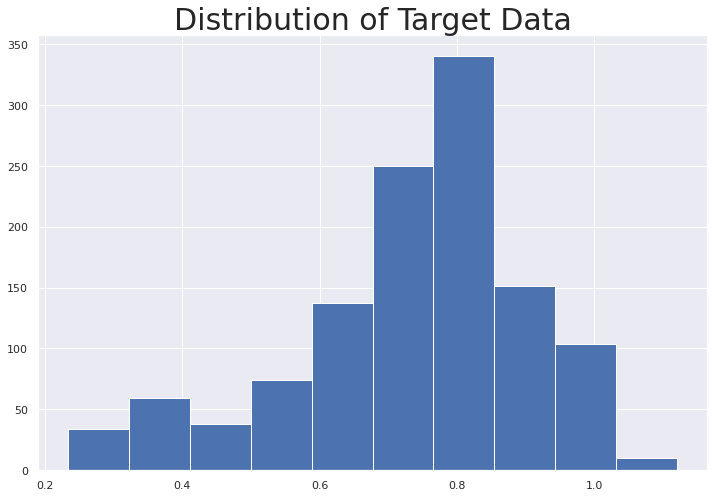

In [172]:
fig = plt.figure(figsize = (12,8))
plt.title('Distribution of Target Data', size = 30)
_ = plt.hist(train.actual_productivity, 10)

### <span style = 'color:orange'> **plt.boxplot(df['컬럼'])** </span>
* 이상치 확인에 주로 사용

1. 자료의 특성을 요약하는 그래프
2. 다섯 숫자 요약 : 최대, 최소, 1사분위수, 3사분위수, 중앙값
3. 데이터 사이언스에서는 주로 이상치 확인을 위해 그림
4. **예시) 요일 별 지출 정보 (day vs total_bill)**
5. x: 컬럼, y: 통계
6. **`plt.boxplot(df[’컬럼’])`**

### <span style = 'color:orange'> **plt.pie(x, labels = y)** </span>
* 전체 대비 차지 비율 확인에 적합

1. 전체에 대한 각 항목의 비율을 원 모양으로 나타낸 그래프
2. 백분율 데이터에 주로 사용
3. **예시) 관람등급 분포**
4. y: 카테고리, x: 빈도
5. **`plt.pie(빈도, labels = 카테고리)`**

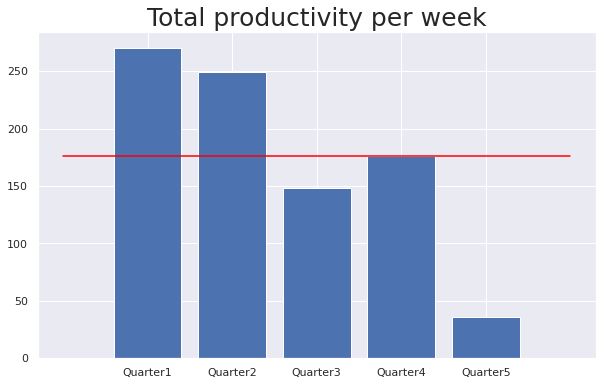

In [173]:
fig = plt.figure(figsize = (10,6))
tmp = train.groupby('quarter').sum()[target]
_ = plt.bar(x = tmp.index, height = tmp.values)
_ = plt.plot([-1,len(tmp)], [tmp.values.mean(),tmp.values.mean()], color = 'red')
_ = plt.title('Total productivity per week', size = 25)

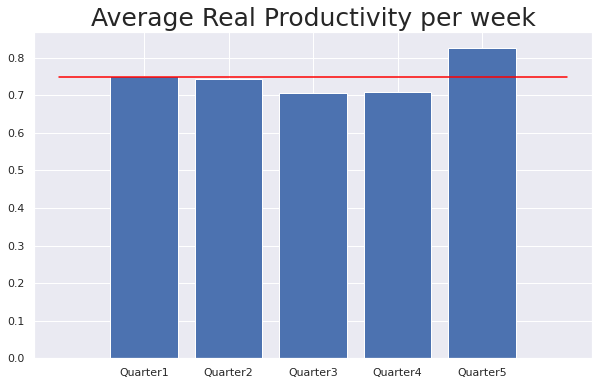

In [174]:
fig = plt.figure(figsize = (10,6))
tmp = train.groupby('quarter').mean()[target]
_ = plt.bar(x = tmp.index, height = tmp.values)
_ = plt.plot([-1,len(tmp)], [tmp.values.mean(),tmp.values.mean()], color = 'red')
_ = plt.title('Average Real Productivity per week', size = 25)

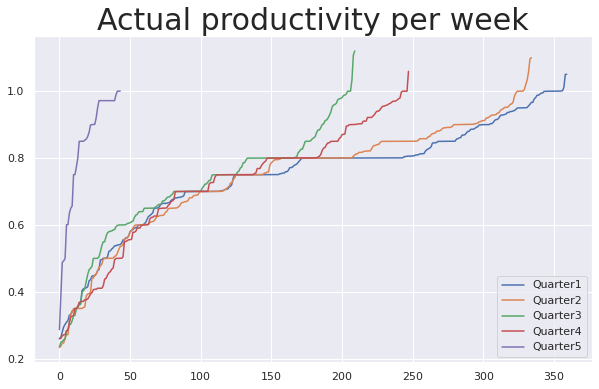

In [175]:
fig = plt.figure(figsize = (10,6))
def quarter(num):
    tmp = train[train.quarter==f'Quarter{num}'][target].reset_index(drop = True)
    tmp.sort_values(inplace = True)
    tmp.reset_index(drop = True, inplace = True)
    return tmp

tmp1 = quarter(1)
_ = tmp1.plot()
# _ = plt.scatter(tmp.index, tmp.values)

tmp2 = quarter(2)
_ = tmp2.plot()

tmp3 = quarter(3)
_ = tmp3.plot()

tmp4 = quarter(4)
_ = tmp4.plot()

tmp5 = quarter(5)
_ = tmp5.plot()

_ = plt.title('Actual productivity per week', size = 30)
_ = plt.legend(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'])

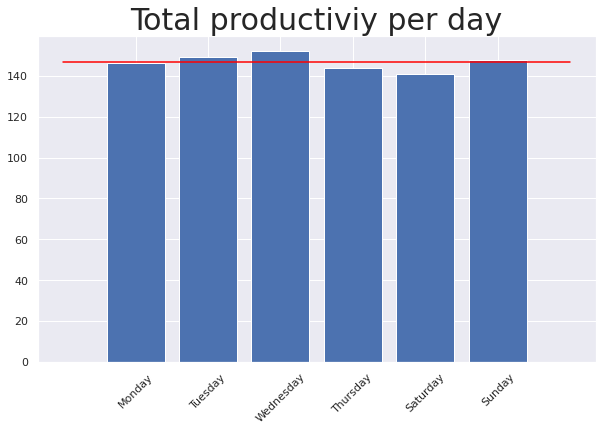

In [176]:
fig = plt.figure(figsize = (10,6))
tmp = train.groupby('day').sum()[[target]]
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])}
tmp['num'] = tmp.index.map(day2num)
tmp.sort_values('num', inplace = True)

_ = plt.bar(x = tmp.index, height = tmp[target])
_ = plt.plot([-1,len(tmp)], [tmp[target].mean(),tmp[target].mean()], color = 'red')

_ = plt.xticks(rotation = 45)
_ = plt.title('Total productiviy per day',size = 30)

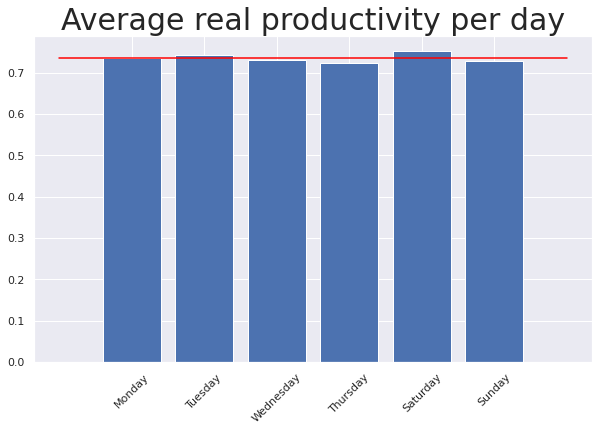

In [177]:
fig = plt.figure(figsize = (10,6))
tmp = train.groupby('day').mean()[[target]]
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])} # 'Friday', 
tmp['num'] = tmp.index.map(day2num)
tmp.sort_values('num', inplace = True)

_ = plt.bar(x = tmp.index, height = tmp[target])
_ = plt.plot([-1,len(tmp)], [tmp[target].mean(),tmp[target].mean()], color = 'red')

_ = plt.xticks(rotation = 45)
_ = plt.title('Average real productivity per day', size = 30)

## **Production by department**

In [178]:
train.groupby('department').sum()[target]

department
finishing    380.99299
sweing       498.91090
Name: actual_productivity, dtype: float64

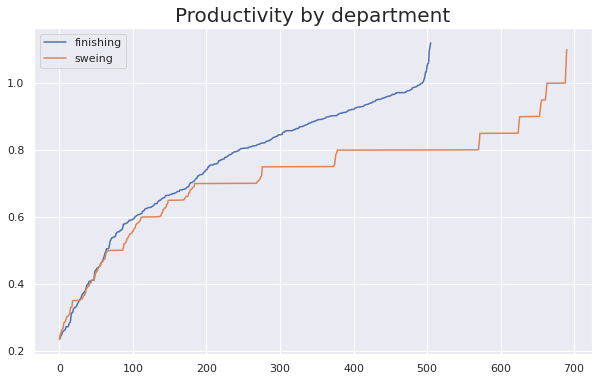

In [179]:
fig = plt.figure(figsize = (10,6))
_ = train[train.department=='finishing'][target].sort_values().reset_index(drop = True).plot()
_ = train[train.department=='sweing'][target].sort_values().reset_index(drop = True).plot()

_ = plt.title('Productivity by department', size = 20)
_ = plt.legend(['finishing', 'sweing'])

## **Correlation between columns**

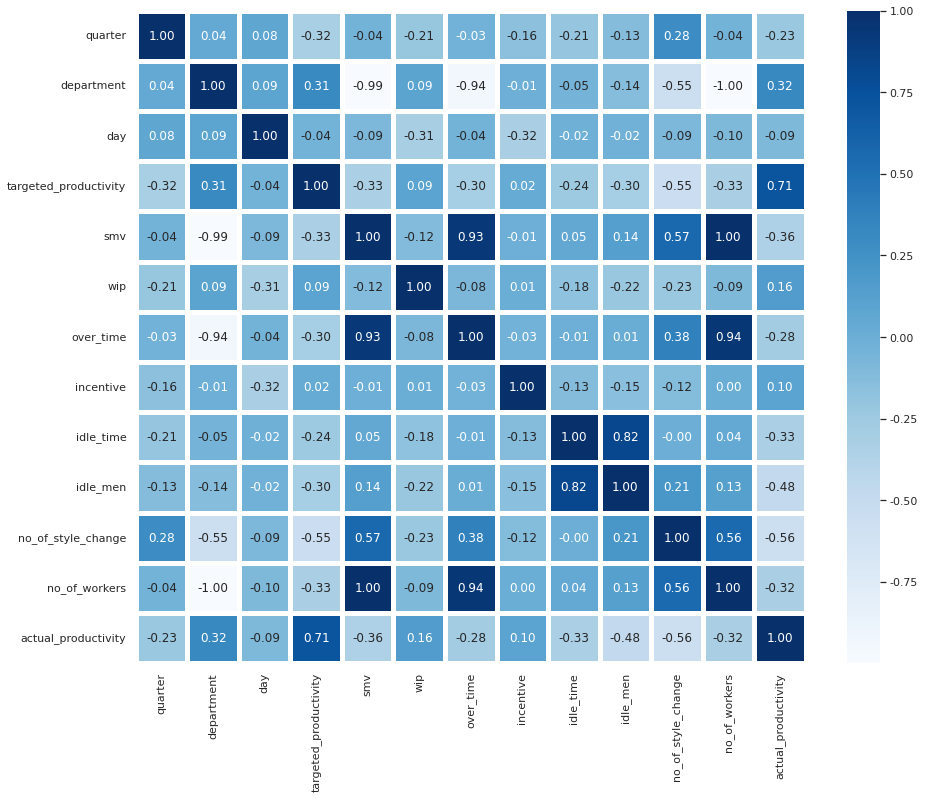

In [180]:
## 문자형으로 된 범주형 데이터를 수치형으로 바꿔야 히트맵 그릴 수 있음.
train_df = train.copy()

quarter2num = {i:enu for enu, i in enumerate(train_df.quarter.unique())}
depart2num = {i:enu for enu, i in enumerate(train_df.department.unique())}
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])} # 'Friday', 

train_df.quarter = train_df.quarter.map(quarter2num)
train_df.department = train_df.department.map(depart2num)
train_df.day = train_df.day.map(day2num)

corr = train_df.corr()
corr2 = corr.apply(lambda x : round(x,2))
_ = plt.figure(figsize = (15,12))
_ = sns.heatmap(corr2.corr(method = 'pearson'), # 상관관계
                annot = True, # 값 표시
                fmt = '.2f',
                linewidth = 5, # 나누는 선
                cmap = 'Blues') # 색상 팔레트

## **Outliers and Distributions**

In [181]:
def vibox(var):
    _ = plt.figure(figsize = (5, 8))
    _ = plt.violinplot(var, data = train)
    _ = plt.boxplot(var, data = train)
    _ = plt.title(f'{var} Outliers and Distributions')

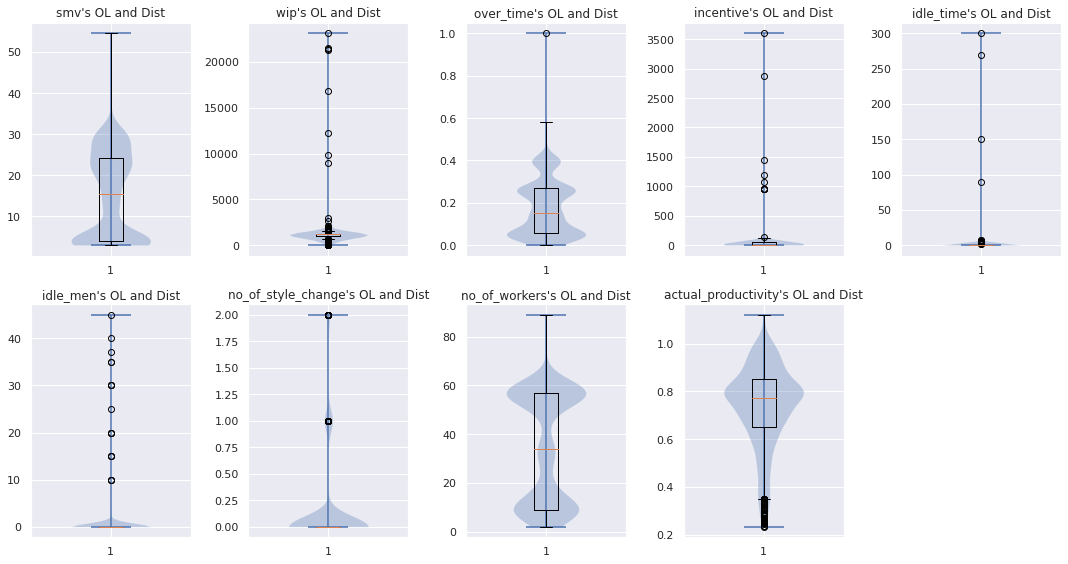

In [182]:
fig = plt.figure(figsize = (15, 8))
rows = 2
cols = 5
for enu,i in enumerate(train.columns[5:]):
    ax = fig.add_subplot(rows, cols, enu+1)
    # vibox(i)
    _ = ax.violinplot(i, data = train)
    _ = ax.boxplot(i, data = train)
    _ = ax.set_title( i + "'s "+ 'OL and Dist')
plt.tight_layout()


## **Reference Model**
- Basic regression model
- Note only as current and reference model
- More techniques will be used to improve the model in the future


#### Import

In [183]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [184]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

#### Data Load

In [185]:
train_df = pd.read_csv('./train.csv')

In [186]:
train_x = train_df.drop(columns=["ID", "actual_productivity"])
train_y = train_df["actual_productivity"]

In [187]:
test_x = pd.read_csv('./test.csv').drop(columns=['ID'])

#### Data Pre-processing

In [188]:
# NaN to mean
train_wip_mean = np.mean(train_x["wip"])
train_x = train_x.replace({'wip': np.nan}, train_wip_mean)
test_X = test_x.replace({'wip': np.nan}, train_wip_mean) # Test 'wip' 데이터의 평균으로 대체 시 Data Leakage이므로, Train 'wip' 데이터의 평균으로 결측치 대체합니다.

# qualitative to quantitative
qual_col = ['quarter','department','day']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    # Label Encoder가 Test 데이터로부터 Fitting되는 것은 Data Leakage이므로, Test 데이터에는 Train 데이터로 Fitting된 Label Encoder로부터 transform만 수행되어야 합니다.
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


#### Regression Model Fit

In [189]:
LR = LinearRegression().fit(train_x, train_y)
print('Done.')

Done.


#### Inference

In [190]:
preds = LR.predict(test_x)
print('Done.')

Done.


#### Submit

In [191]:
submit = pd.read_csv('./sample_submission.csv')

In [192]:
submit['actual_productivity'] = preds

In [193]:
submit.to_csv('./submit.csv', index=False)

### **Future Model Improvement Plan**